![alt text](path_to_banner_image.jpg)
# Predicting Student Success with Machine Learning
Author: Elijah Lopez



Realinho, V., Vieira Martins, M., Machado, J., & Baptista, L. (2021). Predict Students' Dropout and Academic Success [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89.
from https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

## Overview


## Business Problem


## Data


### Summary of Data Findings


## Potential Routes of Analysis


## Chosen Metrics for Analysis


## Data Cleaning & Feature Engineering

## Analysis

### Direction 1


#### Direction 1 Statistical Testing
Rationale for test selection
H0:
H1:

Recommendation 1:

### Direction 2


#### Direction 2 Statistical Testing
Rationale for test selection
H0:
H1:

Recommendation 2:

### Direction 3

#### Direction 3 Statistical Testing
Rationale for test selection
H0:
H1:

Recommendation 3:

## Results


### Direction 1
* 


### Direction 2
* 


### Direction 3
* 

## Conclusions
This analysis leads to three recommendations.

1. 

2. 

3. 

## Next Steps
* 

In [51]:
# Standard Data Science/Analysis Toolkit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use("ggplot")
import seaborn as sns

# Inferential Statistical Tests
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest


# Machine Learning Tools, Utilities, and Scoring Metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, RepeatedKFold, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, mean_squared_error, r2_score, explained_variance_score


# Suite of Machine Learning Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from xgboost import XGBRegressor


# Setup to Ignore Version Errors and Deprecations
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Display all columsn to get a feel for data structure and feature data
pd.set_option('display.max_columns', None)

df = pd.read_csv('data\predicting_students_dropout_and_academic_success.csv', sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# Rename columns for conciseness and better readability
df = df.rename(columns={
    "Marital status": "marital_status",
    "Application mode": "application_mode", 
    "Application order": "application_order",
    "Course": "course",
    "Daytime/evening attendance\t": "class_time",
    "Previous qualification": "prev_qual",
    "Previous qualification (grade)": "prev_grade",
    "Nacionality": "nationality",
    "Mother's qualification": "mother_qual",
    "Father's qualification": "father_qual",
    "Mother's occupation": "mother_occ",
    "Father's occupation": "father_occ",
    "Admission grade": "admission_grade",
    "Displaced": "displaced",
    "Educational special needs": "special_needs",
    "Debtor": "debtor",
    "Tuition fees up to date": "tuition_current",
    "Gender": "gender",
    "Scholarship holder": "scholarship",
    "Age at enrollment": "age_enrolled",
    "International": "international",
    "Curricular units 1st sem (credited)": "units_cred_1s",
    "Curricular units 1st sem (enrolled)": "units_enr_1s",
    "Curricular units 1st sem (evaluations)": "units_eval_1s",
    "Curricular units 1st sem (approved)": "units_app_1s",
    "Curricular units 1st sem (grade)": "units_grade_1s",
    "Curricular units 1st sem (without evaluations)": "units_no_eval_1s",
    "Curricular units 2nd sem (credited)": "units_cred_2s",
    "Curricular units 2nd sem (enrolled)": "units_enr_2s",
    "Curricular units 2nd sem (evaluations)": "units_eval_2s",
    "Curricular units 2nd sem (approved)": "units_app_2s",
    "Curricular units 2nd sem (grade)": "units_grade_2s",
    "Curricular units 2nd sem (without evaluations)": "units_no_eval_2s",
    "Unemployment rate": "unemployment_rate",
    "Inflation rate": "inflation_rate",
    "GDP": "gdp",
    "Target": "target"
})

df.head()

,marital_status,application_mode,application_order,course,class_time,prev_qual,prev_grade,nationality,mother_qual,father_qual,mother_occ,father_occ,admission_grade,displaced,special_needs,debtor,tuition_current,gender,scholarship,age_enrolled,international,units_cred_1s,units_enr_1s,units_eval_1s,units_app_1s,units_grade_1s,units_no_eval_1s,units_cred_2s,units_enr_2s,units_eval_2s,units_app_2s,units_grade_2s,units_no_eval_2s,unemployment_rate,inflation_rate,gdp,target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
# Take a look at data types of each column and observe dimensionality of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marital_status     4424 non-null   int64  
 1   application_mode   4424 non-null   int64  
 2   application_order  4424 non-null   int64  
 3   course             4424 non-null   int64  
 4   class_time         4424 non-null   int64  
 5   prev_qual          4424 non-null   int64  
 6   prev_grade         4424 non-null   float64
 7   nationality        4424 non-null   int64  
 8   mother_qual        4424 non-null   int64  
 9   father_qual        4424 non-null   int64  
 10  mother_occ         4424 non-null   int64  
 11  father_occ         4424 non-null   int64  
 12  admission_grade    4424 non-null   float64
 13  displaced          4424 non-null   int64  
 14  special_needs      4424 non-null   int64  
 15  debtor             4424 non-null   int64  
 16  tuition_current    4424 

In [5]:
# Check for null values
df.isna().sum().sum()

0

* We have 4,424 entries (students) measured on 36 feature columns and 1 target column
* Many columns are listed as integers but are in fact encoded categorical labels
* These should be grouped and handled by:
    * Binary - Leave as is
    * Cardinal - Utilize target encoding
    * Ordinal - Rank and order label schema and recode as necessary
    * Unrelated categorical - Utilize one hot encoding
    * Numerical - Leave as is

In [6]:
# Separate categorical features
cat_cols = [
 'marital_status',
 'application_mode',
 'application_order',
 'course',
 'class_time',
 'prev_qual',
 
 'nationality',
 'mother_qual',
 'father_qual',
 'mother_occ',
 'father_occ',
 
 'displaced',
 'special_needs',
 'debtor',
 'tuition_current',
 'gender',
 'scholarship',
 
 'international',
 
 'target']

In [7]:
'prev_grade',
'admission_grade',
'age_enrolled',
'units_cred_1s',
'units_enr_1s',
'units_eval_1s',
'units_app_1s',
'units_grade_1s',
'units_no_eval_1s',
'units_cred_2s',
'units_enr_2s',
'units_eval_2s',
'units_app_2s',
'units_grade_2s',
'units_no_eval_2s',
'unemployment_rate',
'inflation_rate',
'gdp',

('gdp',)

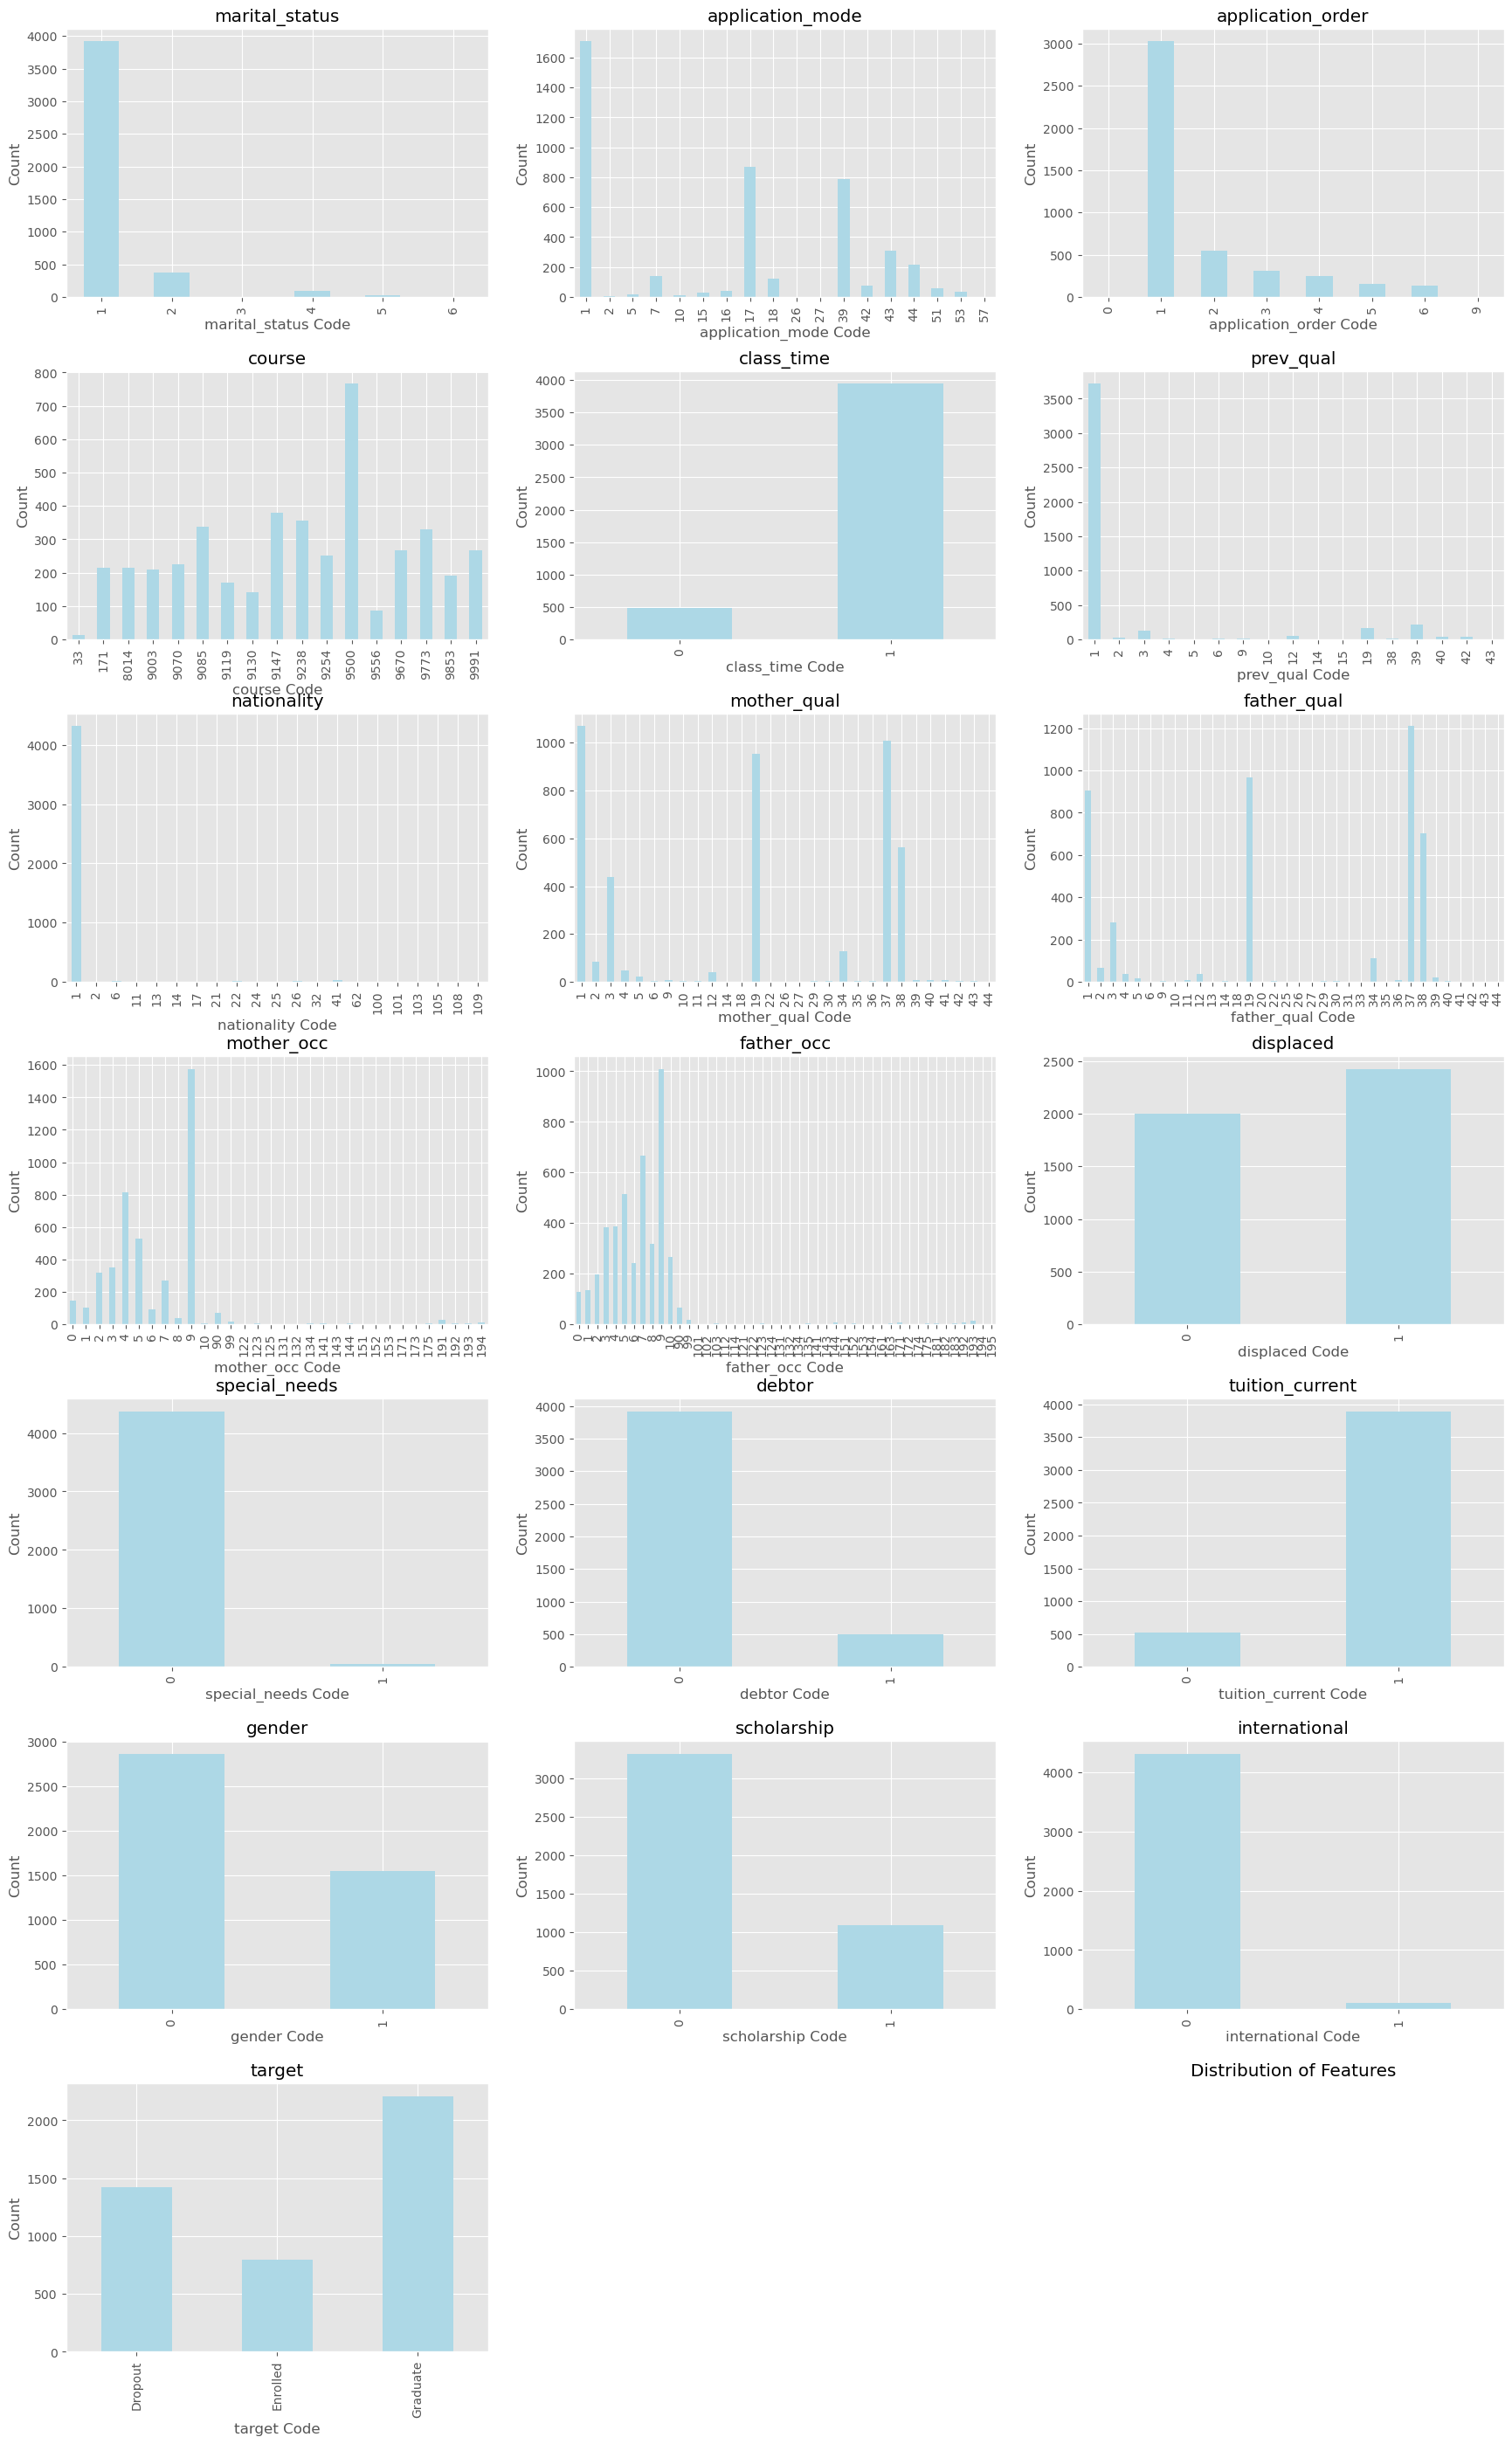

In [8]:
# Check the distribution of each

# Define the number of columns per row
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create a figure with the calculated number of rows and columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
fig.tight_layout(pad=4.0)

# Flatten axes array for easy iteration if more than one row is present
axes = axes.flatten()

for i, column in enumerate(cat_cols):
    df[column].value_counts().sort_index().plot(kind='bar', color='lightblue', ax=axes[i])
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel(f'{column} Code')
    axes[i].set_ylabel('Count')

# Turn off unused axes if the number of plots is less than n_rows * n_cols
for j in range(i + 1, n_rows * n_cols):
    axes[j].axis('off')

plt.title('Distribution of Features')
plt.show()

* Binary - Leave as is
    * Daytime/evening attendance
    * Displaced - Nearly even distribution
    * Educational special needs - Almost completely one-sided toward not having special needs
    * Debtor - Highly skewed toward no debtor
    * Tuition fees up to date - Highly skewed toward up to date payments
    * Gender - About twice as many female students recorded
    * Scholarship holder - Highly skewed toward no awarded scholarships
    * International - Almost completely one-sided toward domestic students
* Cardinal - Utilize target encoding to explore but keep dimensionality low
    * Course
    * Nacionality
    * Marital status
* Ordinal - Rank and order label schema and recode as necessary
    * Application order - Keep as is
    * Mother's qualification - Remap to more logical order
    * Father's qualification - Remap to more logical order
* Unrelated categorical - Utilize one hot encoding
    * Application mode
    * Previous qualification
    * Mother's occupation
    * Father's occupation
* Target - Will need to encode:
    * 0 = Dropout
    * 1 = Enrolled
    * 2 = Graduated

Questions:
1. Does time of classes affect Student Success?
2. Does displacement affect Student Success?
3. Do students that earn scholarships have higher likelihood of graduating?

In [9]:
cat_df = df[cat_cols]
cat_df.head()

,marital_status,application_mode,application_order,course,class_time,prev_qual,nationality,mother_qual,father_qual,mother_occ,father_occ,displaced,special_needs,debtor,tuition_current,gender,scholarship,international,target
0,1,17,5,171,1,1,1,19,12,5,9,1,0,0,1,1,0,0,Dropout
1,1,15,1,9254,1,1,1,1,3,3,3,1,0,0,0,1,0,0,Graduate
2,1,1,5,9070,1,1,1,37,37,9,9,1,0,0,0,1,0,0,Dropout
3,1,17,2,9773,1,1,1,38,37,5,3,1,0,0,1,0,0,0,Graduate
4,2,39,1,8014,0,1,1,37,38,9,9,0,0,0,1,0,0,0,Graduate


Does time of classes affect Student Success?
- 0 = Evening classes
- 1 = Daytime classes

In [24]:
# Group by class_time and count target
time_target_df = cat_df.groupby(by=['class_time', 'target']).size().unstack(fill_value=0)
time_target_df.reset_index(inplace=True)
time_target_df.columns.name = None
time_target_df


,class_time,Dropout,Enrolled,Graduate
0,0,207,75,201
1,1,1214,719,2008


In [18]:
# Convert counts to percentages for evening (0) and morning classes (1)
perc_time_target_df = time_target_df.copy()
perc_time_target_df['Total'] = perc_time_target_df[['Dropout', 'Enrolled', 'Graduate']].sum(axis=1)
for category in ['Dropout', 'Enrolled', 'Graduate']:
    perc_time_target_df[category] = (perc_time_target_df[category] / perc_time_target_df['Total']) * 100

perc_time_target_df.drop(columns=['Total'], inplace=True)
perc_time_target_df

,class_time,Dropout,Enrolled,Graduate
0,0,42.857143,15.52795,41.614907
1,1,30.804364,18.24410,50.951535


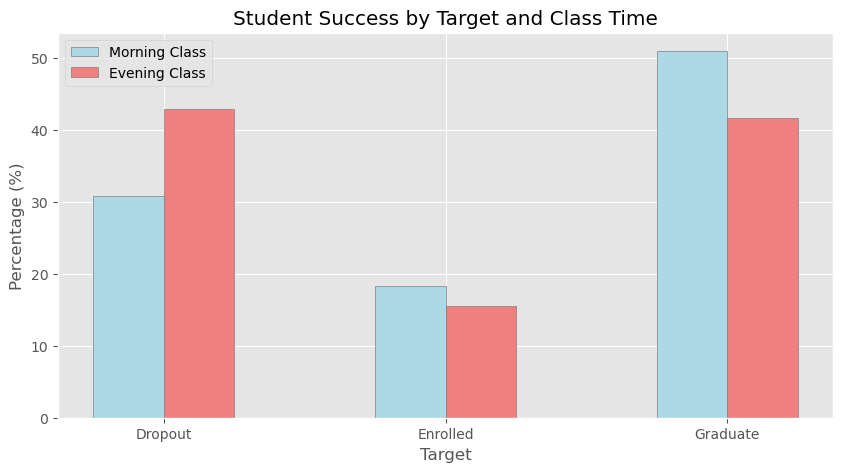

In [19]:
# Bar graph of Student Success by Target and Class Time

fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.25

# Define the positions for each group of bars (grouped by Target)
x = ['Dropout', 'Enrolled', 'Graduate']
r1 = np.arange(len(x))  # 'morning' on left
r2 = [x + bar_width for x in r1]  # 'evening' on right

# Plot the bars
ax.bar(r1, perc_time_target_df.iloc[1, 1:], color='lightblue', width=bar_width, edgecolor='grey', label='Morning Class')  # 'morning' == blue
ax.bar(r2, perc_time_target_df.iloc[0, 1:], color='lightcoral', width=bar_width, edgecolor='grey', label='Evening Class')  # 'evening' == red

# Set titles and labels
ax.set_title('Student Success by Target and Class Time')
ax.set_xlabel('Target')
ax.set_ylabel('Percentage (%)')
ax.set_xticks([r + bar_width / 2 for r in range(len(x))])  # Position x-ticks at the center of the grouped bars
ax.set_xticklabels(x)  # Use Target as labels for x-axis

# Add legend
ax.legend()

# Display the plot
plt.show();


I will use a Chi-Square Test to determine if these categorical values differ from expectations or not.

* H0: There is no significant difference in student success (Dropout, Enrolled, Graduate) based on class time (morning vs. evening).
* H1: There is a significant difference in student success (Dropout, Enrolled, Graduate) based on class time (morning vs. evening).

In [64]:
# Function to conduct Chi-Square test over data frame with given alpha
def chi_square_test(data_frame, alpha):
    alpha = alpha

    # Chi-Square Test
    chi2, p_value, dof, expected = chi2_contingency(data_frame[['Dropout', 'Enrolled', 'Graduate']])

    # Print the results
    print(f'Expected Frequencies Table: \n{expected}')
    print(f'\nChi-Square Value: {chi2}')
    print(f'p-value: {p_value}')
    if p_value < alpha:
        print(f'Reject the null hypothesis in favor of the alternative.')
    else: 
        print(f'Fail to reject the null hypothesis.')

In [41]:
# Run Test. Result is significant!
chi_square_test(time_target_df, 0.05)

Expected Frequencies Table: 
[[ 641.76265823  358.59222423  997.64511754]
 [ 779.23734177  435.40777577 1211.35488246]]

Chi-Square Value: 57.754195314669914
p-value: 2.8763109461402946e-13
Reject the null hypothesis in favor of the alternative.


Does displacement affect Student Success?

In [27]:
# Group by displaced and count target
displaced_target_df = cat_df.groupby(by=['displaced', 'target']).size().unstack(fill_value=0)
displaced_target_df.reset_index(inplace=True)
displaced_target_df.columns.name = None
displaced_target_df

,displaced,Dropout,Enrolled,Graduate
0,0,752,361,885
1,1,669,433,1324


In [29]:
# Convert counts to percentages for evening (0) and morning classes (1)
perc_displaced_target_df = displaced_target_df.copy()
perc_displaced_target_df['Total'] = perc_displaced_target_df[['Dropout', 'Enrolled', 'Graduate']].sum(axis=1)
for category in ['Dropout', 'Enrolled', 'Graduate']:
    perc_displaced_target_df[category] = (perc_displaced_target_df[category] / perc_displaced_target_df['Total']) * 100

perc_displaced_target_df.drop(columns=['Total'], inplace=True)
perc_displaced_target_df

,displaced,Dropout,Enrolled,Graduate
0,0,37.637638,18.068068,44.294294
1,1,27.576257,17.848310,54.575433


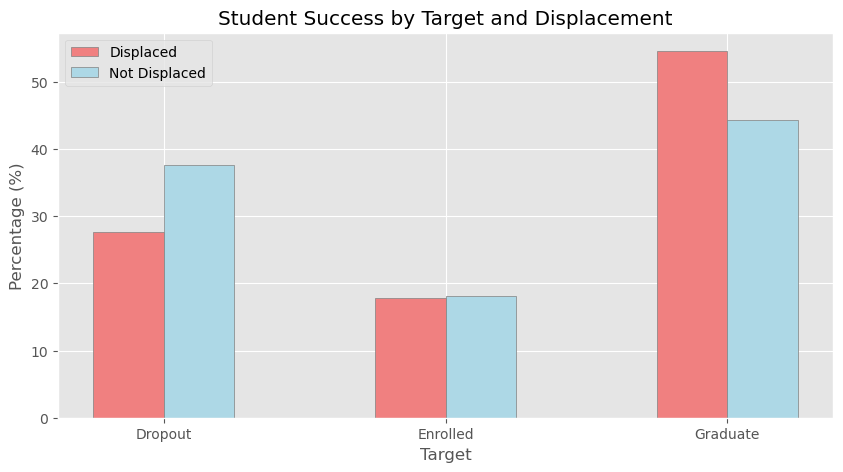

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.25

# Define the positions for each group of bars (grouped by Target)
x = ['Dropout', 'Enrolled', 'Graduate']
r1 = np.arange(len(x))  # 'Displaced' on left
r2 = r1 + bar_width  # 'Not Displaced' on right

# Plot the bars
ax.bar(r1, perc_displaced_target_df.iloc[1, 1:], color='lightcoral', width=bar_width, edgecolor='grey', label='Displaced')  # 'Displaced' == red
ax.bar(r2, perc_displaced_target_df.iloc[0, 1:], color='lightblue', width=bar_width, edgecolor='grey', label='Not Displaced')  # 'Not Displaced' == blue

# Set titles and labels
ax.set_title('Student Success by Target and Displacement')
ax.set_xlabel('Target')
ax.set_ylabel('Percentage (%)')
ax.set_xticks(r1 + bar_width / 2)  # Position x-ticks at the center of the grouped bars
ax.set_xticklabels(x)  # Use Target as labels for x-axis

# Add legend
ax.legend()

# Display the plot
plt.show();

I will use a Chi-Square Test to determine if these categorical values differ from expectations or not.

* H0: There is no significant difference in student success (Dropout, Enrolled, Graduate) based on displacement.
* H1: There is a significant difference in student success (Dropout, Enrolled, Graduate) based on displacement.

In [42]:
# Run the test. Not a significant result!
chi_square_test(displaced_target_df, 0.05)

Expected Frequencies Table: 
[[32.60694743 17.95818902 49.43486355]
 [32.60694743 17.95818902 49.43486355]]

Chi-Square Value: 2.6227441281364126
p-value: 0.26945009984051926
Reject the alternative hypothesis in favor of the null.


Do students that earn scholarships have higher likelihood of graduating?

In [44]:
# Group by scholarship and count target
scholarship_target_df = cat_df.groupby(by=['scholarship', 'target']).size().unstack(fill_value=0)
scholarship_target_df.reset_index(inplace=True)
scholarship_target_df.columns.name = None
scholarship_target_df

,scholarship,Dropout,Enrolled,Graduate
0,0,1287,664,1374
1,1,134,130,835


In [52]:
# Calculate number of graduates that earned scholarships out of total scholarships
# Calculate number of graduates that did not earn scholarships out of total students
grads_with_scholarship = scholarship_target_df.loc[1, 'Graduate']
total_scholarships = scholarship_target_df.loc[1, 'Dropout'] + scholarship_target_df.loc[1, 'Enrolled'] + scholarship_target_df.loc[1, 'Graduate']

grads_with_no_scholarship = scholarship_target_df.loc[0, 'Graduate']
total_with_no_scholarship = scholarship_target_df.loc[0, 'Dropout'] + scholarship_target_df.loc[0, 'Enrolled'] + scholarship_target_df.loc[0, 'Graduate']

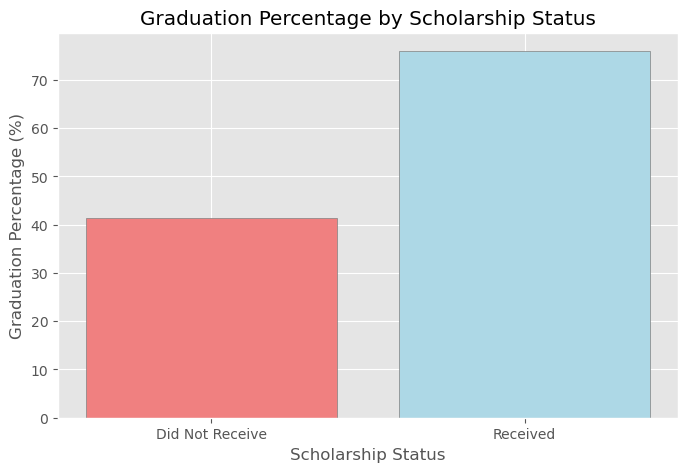

In [62]:
import matplotlib.pyplot as plt

# Calculate percentages
percentage_grads_with_scholarship = (grads_with_scholarship / total_scholarships) * 100
percentage_grads_with_no_scholarship = (grads_with_no_scholarship / total_with_no_scholarship) * 100

# Data for plotting
labels = ['Did Not Receive', 'Received']  # Reversed the order here
percentages = [percentage_grads_with_no_scholarship, percentage_grads_with_scholarship]  # Reversed the order here

# Create a bar chart
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the bars
ax.bar(labels, percentages, color=['lightcoral', 'lightblue'], edgecolor='grey')

# Set titles and labels
ax.set_title('Graduation Percentage by Scholarship Status')
ax.set_xlabel('Scholarship Status')
ax.set_ylabel('Graduation Percentage (%)')

# Display the plot
plt.show();

I will use a Z-Test because that will help me compare the means of these two groups.

* H0: There is no difference in the graduation rates between students with scholarships and students without scholarships.
* H1: There is a significant difference in graduation rates between students with scholarships and students without scholarships.

In [54]:
count = [grads_with_scholarship, grads_with_no_scholarship]  # Number of successes (graduates)
nobs = [total_scholarships, total_with_no_scholarship]  # Total number of observations (students)

In [63]:
# Perform Z-test for proportions
z_stat, p_value = proportions_ztest(count, nobs)

# Print the results
print(f'Z-statistic: {z_stat}')
print(f'p-value: {p_value}')

# Interpretation based on a significance level (e.g., alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print(f'Reject the null hypothesis in favor of the alternative.')
else:
    print(f'Fail to reject the null hypothesis.')


Z-statistic: 19.91964418915078
p-value: 2.7493749740442245e-88
Reject the null hypothesis in favor of the alternative.


## Switch to Numerical Data

In [95]:
num_cols = [
    'prev_grade',
    'admission_grade',
    'age_enrolled',
    'units_cred_1s',
    'units_enr_1s',
    'units_eval_1s',
    'units_app_1s',
    'units_grade_1s',
    'units_no_eval_1s',
    'units_cred_2s',
    'units_enr_2s',
    'units_eval_2s',
    'units_app_2s',
    'units_grade_2s',
    'units_no_eval_2s',
    'unemployment_rate',
    'inflation_rate',
    'gdp'
]

                   prev_grade  admission_grade  age_enrolled  units_cred_1s  \
prev_grade           1.000000         0.580444     -0.111377      -0.008872   
admission_grade      0.580444         1.000000     -0.029915       0.040829   
age_enrolled        -0.111377        -0.029915      1.000000       0.226837   
units_cred_1s       -0.008872         0.040829      0.226837       1.000000   
units_enr_1s        -0.029169        -0.033251      0.141327       0.774344   
units_eval_1s       -0.070702        -0.072059      0.139911       0.542919   
units_app_1s         0.048410         0.070892     -0.053405       0.628394   
units_grade_1s       0.059438         0.073868     -0.156616       0.122978   
units_no_eval_1s    -0.003926         0.009033      0.057470       0.116262   
units_cred_2s       -0.018489         0.040225      0.207561       0.944811   
units_enr_2s        -0.031649        -0.041878      0.085914       0.644826   
units_eval_2s       -0.061355        -0.057132      

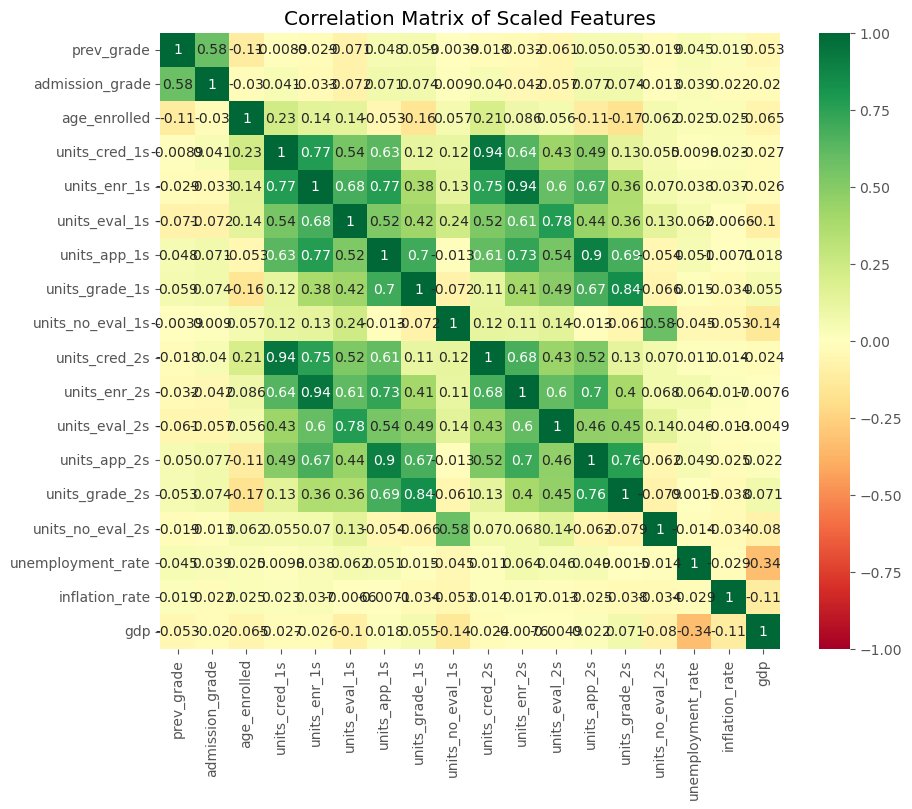

In [96]:
correlation_matrix = df.drop(columns=cat_cols, axis=1).corr()

# Print correlation matrix
print(correlation_matrix)

# Optional: Plotting the correlation matrix for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Scaled Features")
plt.show()

In [ ]:
Questions:
1. 

In [13]:
num_df = df[num_cols].copy()
num_df['target'] = df['target']
num_df.head()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,122.0,127.3,20,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,160.0,142.5,19,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,122.0,124.8,19,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,122.0,119.6,20,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,100.0,141.5,45,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [97]:
# creating function to reset scores for model performance tests for different X_train variations
def reset_model_scores(models):
  for name in models:
    models[name]["All_Scores"] = list()
    models[name]["Top_Score"] = float()
    models[name]["Mean_Score"] = float()
    models[name]["Std_Score"] = float()

  return models

In [98]:
def test_models_performance(models, x_train, y_train, isRegressor, num_folds = 10):

  # reset the performance scores first using function above
  reset_model_scores(models)

  # set scoring type based on model type
  scoring = "neg_mean_squared_error" if isRegressor else "accuracy"

  # get the performance scores for each model and add them to the
  # corresponding result list
  for name in models:

    folds = KFold(n_splits=num_folds) if isRegressor else StratifiedKFold(n_splits=num_folds)

    results = cross_val_score(estimator=models[name]["Estimator"],
                              X=x_train,
                              y=y_train,
                              cv=folds,
                              scoring=scoring)
    models[name]["Top_Score"] = results.max()
    models[name]["Mean_Score"] = results.mean()
    models[name]["Std_Score"] = results.std()

    for result in results:
      models[name]["All_Scores"].append(result)

  # print the results
  for name in models:
    print("\n[MODEL TYPE: {}]\n".format(name))
    print(">>>> Top Performance: \t\t{:.4f}".format(models[name]["Top_Score"]))
    print(">>>> Average Performance: \t{:.4f}".format(models[name]["Mean_Score"]))
    print(">>>> Spread of Performance: \t{:.4f}".format(models[name]["Std_Score"]))

In [99]:
# printing accuracy scores
def print_accuracy(y_test, y_pred, isRegressor):

  if isRegressor:
    accuracy = 100 * explained_variance_score(y_test, y_pred)
  else:
    accuracy = 100 * accuracy_score(y_true=y_test,
                                y_pred=y_pred)

  print("> ACCURACY: \t{:.2f}%".format(accuracy))

In [100]:
# Identify the target feature and isolate it to produce X and y data segments
TARGET = 'Target'
X, y = num_df.drop(columns=TARGET), num_df[TARGET]

In [101]:
# Split X and Y into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=42)

In [102]:
# fit the X_train
# transform X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
# now we'll use the minmax scaler
mm_scaler = MinMaxScaler()
X_train_mm_scaled = mm_scaler.fit_transform(X_train)
X_test_mm_scaled = mm_scaler.transform(X_test)

In [104]:
# creating models that we want to test to see which is most optimized
# we will use this to test different X_train variations
models = {
    "LOGREG": {
        "Estimator": LogisticRegression(),
    },

    "DECISION TREE": {
        "Estimator": DecisionTreeClassifier(),
    },

    "KNN": {
        "Estimator": KNeighborsClassifier(),
    },
    "SVM": {
        "Estimator": SVC(),
    },
    "Bayes": {
        "Estimator": GaussianNB(),
    },
}

In [105]:
# Function to reset model scores
def reset_model_scores(models):
    for name in models:
        models[name]["All_Scores"] = list()
        models[name]["Top_Score"] = float()
        models[name]["Mean_Score"] = float()
        models[name]["Std_Score"] = float()

    return models

# Modified performance testing function for classification
def test_models_performance(models, x_train, y_train, isClassifier=True, num_folds=10):
    reset_model_scores(models)

    # Use appropriate scoring metric based on whether it's a classification or regression task
    scoring = "accuracy" if isClassifier else "neg_mean_squared_error"

    # Get the performance scores for each model and add them to the corresponding result list
    for name in models:
        folds = StratifiedKFold(n_splits=num_folds)  # StratifiedKFold for classification
        results = cross_val_score(estimator=models[name]["Estimator"],
                                  X=x_train,
                                  y=y_train,
                                  cv=folds,
                                  scoring=scoring)
        models[name]["Top_Score"] = results.max()
        models[name]["Mean_Score"] = results.mean()
        models[name]["Std_Score"] = results.std()

        for result in results:
            models[name]["All_Scores"].append(result)

    # Print the results
    for name in models:
        print("\n[MODEL TYPE: {}]\n".format(name))
        print(">>>> Top Performance: \t\t{:.4f}".format(models[name]["Top_Score"]))
        print(">>>> Average Performance: \t{:.4f}".format(models[name]["Mean_Score"]))
        print(">>>> Spread of Performance: \t{:.4f}".format(models[name]["Std_Score"]))


In [106]:
from sklearn.metrics import classification_report

# Modify the accuracy printing function for classification
def print_accuracy(y_test, y_pred, isClassifier=True):
    if isClassifier:
        # Print classification metrics like accuracy, precision, recall, F1-score
        print("> ACCURACY: \t{:.2f}%".format(100 * accuracy_score(y_test, y_pred)))
        print("> Classification Report: ")
        print(classification_report(y_test, y_pred))

    else:
        # Regression output
        accuracy = 100 * explained_variance_score(y_test, y_pred)
        print("> ACCURACY: \t{:.2f}%".format(accuracy))


In [107]:
# Test the models with classification task
test_models_performance(models, X_train, y_train, isClassifier=True)

# Print the classification accuracy for the best model (e.g., using Logistic Regression here)
best_model = models["LOGREG"]["Estimator"]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print_accuracy(y_test, y_pred, isClassifier=True)



[MODEL TYPE: LOGREG]

>>>> Top Performance: 		0.7564
>>>> Average Performance: 	0.7415
>>>> Spread of Performance: 	0.0126

[MODEL TYPE: DECISION TREE]

>>>> Top Performance: 		0.6836
>>>> Average Performance: 	0.6499
>>>> Spread of Performance: 	0.0264

[MODEL TYPE: KNN]

>>>> Top Performance: 		nan
>>>> Average Performance: 	nan
>>>> Spread of Performance: 	nan

[MODEL TYPE: SVM]

>>>> Top Performance: 		0.6836
>>>> Average Performance: 	0.6643
>>>> Spread of Performance: 	0.0131

[MODEL TYPE: Bayes]

>>>> Top Performance: 		0.7373
>>>> Average Performance: 	0.6852
>>>> Spread of Performance: 	0.0268
> ACCURACY: 	73.45%
> Classification Report: 
              precision    recall  f1-score   support

     Dropout       0.80      0.73      0.76       316
    Enrolled       0.44      0.24      0.31       151
    Graduate       0.75      0.92      0.82       418

    accuracy                           0.73       885
   macro avg       0.66      0.63      0.63       885
weighted avg     

In [25]:
# Test the models with classification task
test_models_performance(models, X_train, y_train, isClassifier=True)

# Print the classification accuracy for the best model (e.g., using Logistic Regression here)
best_model = models["LOGREG"]["Estimator"]
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test)
print_accuracy(y_test, y_pred, isClassifier=True)



[MODEL TYPE: LOGREG]

>>>> Top Performance: 		0.7564
>>>> Average Performance: 	0.7415
>>>> Spread of Performance: 	0.0126

[MODEL TYPE: DECISION TREE]

>>>> Top Performance: 		0.6893
>>>> Average Performance: 	0.6510
>>>> Spread of Performance: 	0.0314

[MODEL TYPE: KNN]

>>>> Top Performance: 		nan
>>>> Average Performance: 	nan
>>>> Spread of Performance: 	nan

[MODEL TYPE: SVM]

>>>> Top Performance: 		0.6836
>>>> Average Performance: 	0.6643
>>>> Spread of Performance: 	0.0131

[MODEL TYPE: Bayes]

>>>> Top Performance: 		0.7373
>>>> Average Performance: 	0.6852
>>>> Spread of Performance: 	0.0268
> ACCURACY: 	65.08%
> Classification Report: 
              precision    recall  f1-score   support

     Dropout       0.90      0.50      0.65       316
    Enrolled       0.00      0.00      0.00       151
    Graduate       0.59      1.00      0.74       418

    accuracy                           0.65       885
   macro avg       0.50      0.50      0.46       885
weighted avg     

In [26]:
# Test the models with classification task
test_models_performance(models, X_train, y_train, isClassifier=True)

# Print the classification accuracy for the best model (e.g., using Logistic Regression here)
best_model = models["LOGREG"]["Estimator"]
best_model.fit(X_train_mm_scaled, y_train)
y_pred = best_model.predict(X_test)
print_accuracy(y_test, y_pred, isClassifier=True)



[MODEL TYPE: LOGREG]

>>>> Top Performance: 		0.7564
>>>> Average Performance: 	0.7415
>>>> Spread of Performance: 	0.0126

[MODEL TYPE: DECISION TREE]

>>>> Top Performance: 		0.6808
>>>> Average Performance: 	0.6482
>>>> Spread of Performance: 	0.0255

[MODEL TYPE: KNN]

>>>> Top Performance: 		nan
>>>> Average Performance: 	nan
>>>> Spread of Performance: 	nan

[MODEL TYPE: SVM]

>>>> Top Performance: 		0.6836
>>>> Average Performance: 	0.6643
>>>> Spread of Performance: 	0.0131

[MODEL TYPE: Bayes]

>>>> Top Performance: 		0.7373
>>>> Average Performance: 	0.6852
>>>> Spread of Performance: 	0.0268
> ACCURACY: 	56.05%
> Classification Report: 
              precision    recall  f1-score   support

     Dropout       0.92      0.25      0.40       316
    Enrolled       0.00      0.00      0.00       151
    Graduate       0.52      1.00      0.68       418

    accuracy                           0.56       885
   macro avg       0.48      0.42      0.36       885
weighted avg     

In [27]:
print(y_train.value_counts())

Target
Graduate    1791
Dropout     1105
Enrolled     643
Name: count, dtype: int64


Logistic Regression shows promise with an average accuracy of 74.15%. Will look into model improvement

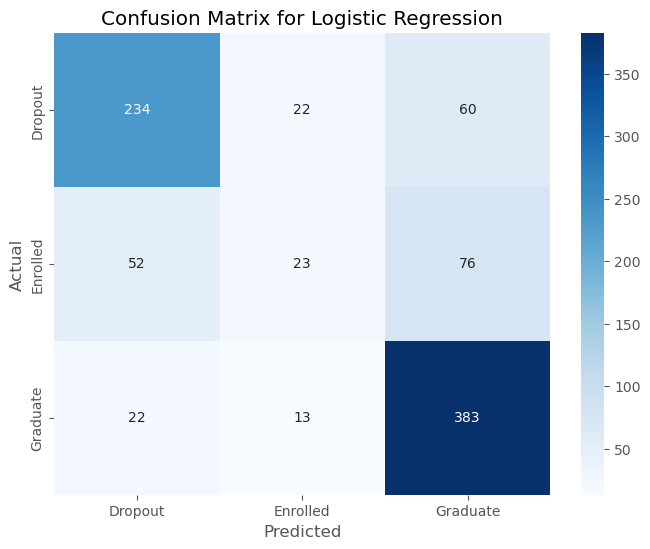

Confusion Matrix:
 [[234  22  60]
 [ 52  23  76]
 [ 22  13 383]]


In [28]:
# Fit the Logistic Regression model
model = LogisticRegression(max_iter=1000, multi_class='ovr')
model.fit(X_train_scaled, y_train)

# Predict the target values for X_test
y_pred = model.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optionally, print the confusion matrix as text
print("Confusion Matrix:\n", cm)